In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importing the dataset
odi_train = pd.read_csv(r'/Users/rahulkosamkar/Documents/Data_Science/Projects/ODI_Match_winner/Data/Train.csv')
odi_test = pd.read_csv(r'/Users/rahulkosamkar/Documents/Data_Science/Projects/ODI_Match_winner/Data/Test.csv')

In [3]:
odi_train.shape,odi_test.shape

((2508, 10), (1075, 9))

In [4]:
odi_train.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner
0,5,4,37,4,Home,Away,Second,First,Dec,4
1,1,14,84,7,Neutral,Neutral,First,Second,Sep,1
2,9,15,47,9,Home,Away,First,Second,Feb,9
3,7,2,102,6,Home,Away,First,Second,Aug,2
4,6,8,46,5,Home,Away,First,Second,Aug,6


In [5]:
odi_test.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch
0,2,4,34,1,Home,Away,First,Second,Oct
1,14,1,19,15,Home,Away,First,Second,Mar
2,9,10,130,14,Neutral,Neutral,Second,First,Dec
3,9,10,8,9,Home,Away,First,Second,Dec
4,5,15,130,14,Neutral,Neutral,First,Second,Oct


In [6]:
odi_train.info(),odi_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team1          2508 non-null   int64 
 1   Team2          2508 non-null   int64 
 2   Stadium        2508 non-null   int64 
 3   HostCountry    2508 non-null   int64 
 4   Team1_Venue    2508 non-null   object
 5   Team2_Venue    2508 non-null   object
 6   Team1_Innings  2508 non-null   object
 7   Team2_Innings  2508 non-null   object
 8   MonthOfMatch   2508 non-null   object
 9   MatchWinner    2508 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 196.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team1          1075 non-null   int64 
 1   Team2          1075 non-null   int64 
 2   Stadium        1075 non-null   int64 
 3  

(None, None)

In [7]:
odi_train.isnull().sum()

Team1            0
Team2            0
Stadium          0
HostCountry      0
Team1_Venue      0
Team2_Venue      0
Team1_Innings    0
Team2_Innings    0
MonthOfMatch     0
MatchWinner      0
dtype: int64

In [8]:
odi_test.isnull().sum()

Team1            0
Team2            0
Stadium          0
HostCountry      0
Team1_Venue      0
Team2_Venue      0
Team1_Innings    0
Team2_Innings    0
MonthOfMatch     0
dtype: int64

# EDA 

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


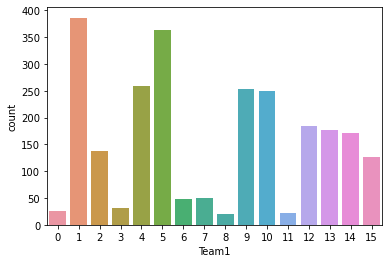

In [9]:
# Team1 numbers
x = odi_train['Team1']
sns.countplot(x)
plt.show()

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


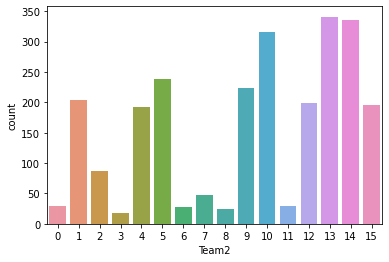

In [10]:
x = odi_train['Team2']
sns.countplot(x)
plt.show()

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


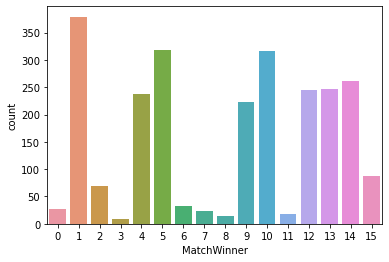

In [11]:
sns.countplot(odi_train['MatchWinner'])
plt.show()

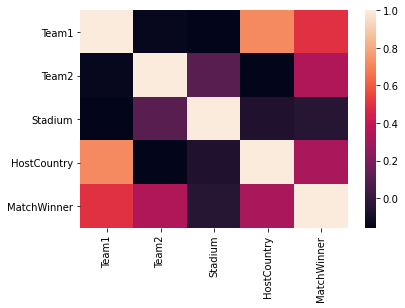

In [12]:
corr = odi_train.corr()
ax = sns.heatmap(
    corr, 
)

In [13]:
odi_train.describe()

,Team1,Team2,Stadium,HostCountry,MatchWinner
count,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000
mean,7.274322,9.179426,73.502791,7.572568,7.991627
std,4.635982,4.574049,43.936337,5.594166,4.694191
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,36.000000,3.000000,4.000000
50%,6.500000,10.000000,71.000000,9.000000,9.000000
75%,12.000000,13.000000,111.000000,13.000000,12.000000
max,15.000000,15.000000,151.000000,16.000000,15.000000


innings and Match win relation

In [14]:
matches_played_byteams=pd.concat([odi_train['Team1'],odi_train['Team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']

In [15]:
matches_played_byteams

,Team,Total Matches
0,5,602
1,1,590
2,10,566
3,13,517
4,14,506
5,9,476
6,4,452
7,12,384
8,15,322
9,2,225


Initialise the Base Model

In [16]:
# use of one-Hot-encoding

train_data = pd.get_dummies(data=odi_train,columns=['Team1_Venue','Team2_Venue','Team1_Innings','Team2_Innings','MonthOfMatch'])
test_data = pd.get_dummies(data=odi_test,columns=['Team1_Venue','Team2_Venue','Team1_Innings','Team2_Innings','MonthOfMatch'])

In [17]:
test_data['Team1_Venue_Away']= 0
test_data['Team2_Venue_Home']= 0

In [18]:
train_data.shape,test_data.shape

((2508, 27), (1075, 26))

In [19]:
train_data.head()

,Team1,Team2,Stadium,HostCountry,MatchWinner,Team1_Venue_Away,Team1_Venue_Home,Team1_Venue_Neutral,Team2_Venue_Away,Team2_Venue_Home,...,MonthOfMatch_Dec,MonthOfMatch_Feb,MonthOfMatch_Jan,MonthOfMatch_Jul,MonthOfMatch_Jun,MonthOfMatch_Mar,MonthOfMatch_May,MonthOfMatch_Nov,MonthOfMatch_Oct,MonthOfMatch_Sep
0,5,4,37,4,4,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,14,84,7,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9,15,47,9,9,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,7,2,102,6,2,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,8,46,5,6,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Team1                 2508 non-null   int64
 1   Team2                 2508 non-null   int64
 2   Stadium               2508 non-null   int64
 3   HostCountry           2508 non-null   int64
 4   MatchWinner           2508 non-null   int64
 5   Team1_Venue_Away      2508 non-null   uint8
 6   Team1_Venue_Home      2508 non-null   uint8
 7   Team1_Venue_Neutral   2508 non-null   uint8
 8   Team2_Venue_Away      2508 non-null   uint8
 9   Team2_Venue_Home      2508 non-null   uint8
 10  Team2_Venue_Neutral   2508 non-null   uint8
 11  Team1_Innings_First   2508 non-null   uint8
 12  Team1_Innings_Second  2508 non-null   uint8
 13  Team2_Innings_First   2508 non-null   uint8
 14  Team2_Innings_Second  2508 non-null   uint8
 15  MonthOfMatch_Apr      2508 non-null   uint8
 16  MonthO

In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Team1                 1075 non-null   int64
 1   Team2                 1075 non-null   int64
 2   Stadium               1075 non-null   int64
 3   HostCountry           1075 non-null   int64
 4   Team1_Venue_Home      1075 non-null   uint8
 5   Team1_Venue_Neutral   1075 non-null   uint8
 6   Team2_Venue_Away      1075 non-null   uint8
 7   Team2_Venue_Neutral   1075 non-null   uint8
 8   Team1_Innings_First   1075 non-null   uint8
 9   Team1_Innings_Second  1075 non-null   uint8
 10  Team2_Innings_First   1075 non-null   uint8
 11  Team2_Innings_Second  1075 non-null   uint8
 12  MonthOfMatch_Apr      1075 non-null   uint8
 13  MonthOfMatch_Aug      1075 non-null   uint8
 14  MonthOfMatch_Dec      1075 non-null   uint8
 15  MonthOfMatch_Feb      1075 non-null   uint8
 16  MonthO

In [22]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.model_selection import train_test_split

In [23]:
X = train_data.drop('MatchWinner',1)
y = train_data['MatchWinner']

In [24]:
# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0)

# Fit the model on train data
rf_clf.fit(X_train,y_train)

# predict on test data
y_pred = rf_clf.predict(X_test)

In [26]:
train_acc = rf_clf.score(X_train,y_train)
print("Training score: %.2f " % train_acc)

Training score: 0.94 


In [27]:
test_acc = rf_clf.score(X_test,y_test)
print("Testing score: %.2f " % test_acc)

Testing score: 0.53 


In [28]:
from xgboost import XGBClassifier

In [29]:
xgb = XGBClassifier()
xgb.fit(X_train.values, y_train)
# predict on test data
y_pred = xgb.predict(X_test.values)

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:15:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
XGB_train_acc = xgb.score(X_train.values,y_train)
print("Training score XGB: %.2f " % train_acc)

Training score XGB: 0.94 


In [31]:
XGB_test_acc = xgb.score(X_test.values,y_test)
print("Testing score XGB: %.2f " % test_acc)

Testing score XGB: 0.53 


Final Prediction

In [32]:
final_pred = xgb.predict(test_data.values)

In [33]:
final_pred

array([ 4,  1, 10, ...,  5, 10,  5])

In [34]:
final_pred.shape,y_train.shape

((1075,), (1755,))

In [35]:
 
y = pd.get_dummies(train_data['MatchWinner'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2504,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


One-Vs-Rest for Multi-Class Classification

In [37]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

xgb1 = XGBClassifier(num_classes=16)
ovr = OneVsRestClassifier(xgb1)

# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 
# format before training.



# Fit the model on train data
ovr.fit(X_train.values,y_train)

# predict on test data
ovr_y_pred = ovr.predict_proba(X_test.values)


/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:15:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "num_classes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:15:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:15:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "num_classes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

[14:15:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "num_classes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:15:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:15:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "num_classes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

In [38]:
a=pd.DataFrame(ovr_y_pred)

In [39]:
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000092,0.000109,0.000153,0.000125,0.000059,0.000815,0.000028,0.002175,0.000131,0.000953,0.000602,0.000617,0.972902,0.272096,0.000108,0.000186
1,0.000032,0.002339,0.000261,0.000153,0.000202,0.000641,0.000292,0.015048,0.000249,0.000999,0.923120,0.000816,0.005821,0.000440,0.011629,0.000173
2,0.000038,0.000353,0.000190,0.000073,0.027164,0.000429,0.000038,0.000137,0.000476,0.783618,0.003884,0.000364,0.000087,0.001416,0.001742,0.002220
3,0.000235,0.000299,0.000023,0.000033,0.000185,0.000802,0.000035,0.000023,0.000162,0.115918,0.000872,0.124300,0.000150,0.000152,0.000403,0.000147
4,0.000024,0.000332,0.000220,0.001956,0.000734,0.458856,0.000131,0.000131,0.000340,0.000096,0.000252,0.000215,0.003725,0.000204,0.435763,0.000245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0.000074,0.001165,0.000047,0.000255,0.985408,0.010167,0.000138,0.000545,0.000178,0.001136,0.000753,0.000093,0.000243,0.000078,0.000317,0.000328
749,0.000036,0.000709,0.000264,0.000034,0.000969,0.831484,0.000037,0.000137,0.000268,0.000419,0.001150,0.000134,0.007118,0.000140,0.005144,0.014334
750,0.000023,0.000054,0.006970,0.000024,0.000650,0.913421,0.000148,0.000161,0.000291,0.000792,0.000055,0.000522,0.195472,0.004033,0.000052,0.000103
751,0.000038,0.291351,0.000287,0.000347,0.614446,0.017904,0.000132,0.000301,0.000424,0.000342,0.000175,0.000059,0.001474,0.000395,0.001273,0.000074


In [40]:
final_ovr_y_pred = ovr.predict_proba(test_data.values)

In [41]:
Test_Winner_Pred = pd.DataFrame(final_ovr_y_pred)

In [42]:
round(Test_Winner_Pred,2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.00,0.07,0.0,0.04,0.01,0.0,0.0,0.0,0.01,0.00,0.00,0.00,0.00,0.0,0.00
1,0.0,0.27,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.01,0.00,0.00,0.2,0.00
2,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.11,0.95,0.00,0.00,0.00,0.0,0.00
3,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.43,0.10,0.00,0.00,0.00,0.0,0.00
4,0.0,0.00,0.00,0.0,0.00,0.13,0.0,0.0,0.0,0.00,0.00,0.00,0.01,0.00,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,0.0,0.00,0.00,0.0,0.00,0.70,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.25
1071,0.0,0.81,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.12,0.00,0.0,0.00
1072,0.0,0.00,0.00,0.0,0.00,0.97,0.0,0.0,0.0,0.00,0.02,0.00,0.00,0.00,0.0,0.00
1073,0.0,0.00,0.00,0.0,0.00,0.01,0.0,0.0,0.0,0.00,0.11,0.00,0.00,0.06,0.0,0.00


In [43]:
Test_Winner_Pred.to_excel(r'C:\Users\ckatkaa\Desktop\jupyter notebook\Machne Hacks\Sample_Submission.xlsx')